<a href="https://colab.research.google.com/github/kareemrb27/Lab2.1/blob/master/CV_3_Assignment_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Verification using Siamese Networks**

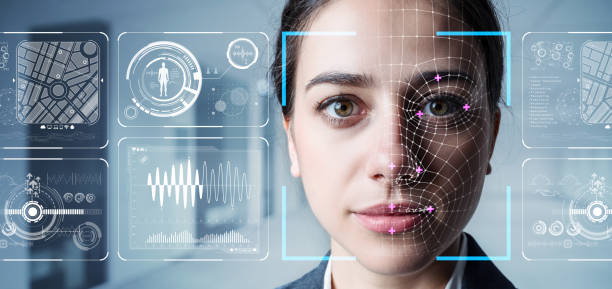
# **Introduction**

Imagine a **face verification system** designed for secure authentication in banking, access control, and online identity verification. The system must:

- **Distinguish between similar and dissimilar faces** by analyzing unique facial features.
- **Generate face embeddings** that cluster similar identities and separate different ones.
- **Enhance security** by reducing false positives in identity verification systems.

Traditional face recognition models struggle with **fine-grained differences** and require large datasets. This project leverages a **Siamese Network** with a **VGG16 backbone**, trained on triplet image samples, to **learn robust facial embeddings**. Using **triplet loss**, the model ensures that similar faces remain close in the embedding space while dissimilar faces are mapped farther apart.

## **What is a Siamese Network?**  

- A **neural network** designed to compare two inputs and determine their similarity.  
- Consists of **twin networks** with shared weights that extract feature embeddings.  
- Measures the **distance** between embeddings to classify pairs as similar or different.  

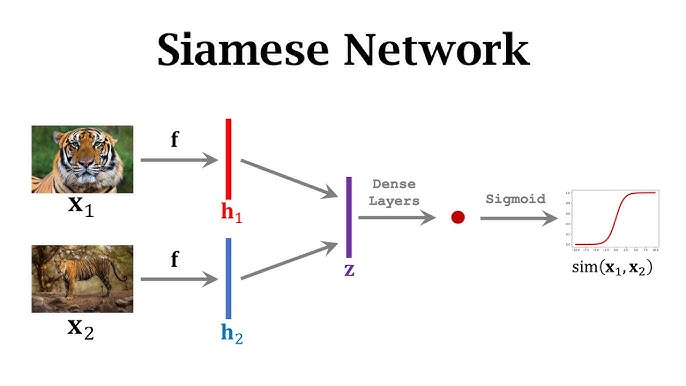

**Table of Contents**

- [Dataset Preparation](#)  
- [Model and Data Preprocessing](#)  
- [Defining Siamese Network and Loss Function](#)  
- [Model Training and Validation](#)
- [Model Saving and Loading](#)  
- [Model Evaluation and Similarity Analysis](#)  


So, this notebook walks you through how to implement a **Siamese Network for face verification**. You will learn how to **preprocess data, train a Siamese model using VGG16, apply triplet loss, evaluate performance, and visualize embeddings** to build a robust face verification system.


# **Step 1: Dataset Preparation**
Before we can train a model, we need data. This phase involves **mounting the asset directory** that contains the dataset, **extracting the dataset from a ZIP file**, and **defining directories** for training and testing images. Setting up a well-structured dataset ensures smooth data loading and processing in later stages.

## **Mounting the asset directory containing dataset**

In [ ]:
import os  # Import the OS module to handle file and directory operations

# Flag to determine whether to use local assets or load from Google Drive
local_assets_b = False

if local_assets_b:
    # Define the directory path for local assets
    assets_dir = "/content/assignment_assets/"

    # Check if the directory exists, if not, ensure that assets.zip is available
    if not os.path.isdir(assets_dir):
        assert os.path.isfile("assets.zip"), "assets.zip file is missing!"
        os.system("unzip assets.zip")  # Unzip assets.zip if the directory doesn't exist

else:
    # If not using local assets, mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')  # Mount Google Drive to access files

    # Define the path to assets stored in Google Drive
    assets_dir = '/content/drive/MyDrive/CV-3/MCQs and Assignment/assets/'

## **Extracting Dataset from a ZIP File**  
  
This code extracts a **ZIP file** containing the dataset from the assets directory and ensures that the extraction is successful. It sets the target folder where the contents will be extracted and verifies the presence of the extracted dataset.  


In [ ]:
import zipfile

# Path to the zip file you want to unzip
zip_file_path = assets_dir + "AT&T.zip"

# Target folder where you want to extract the contents
target_folder = "/content/dataset"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
   zip_ref.extractall(target_folder)

# assert the folder exists
assert os.path.isdir(target_folder + '/AT&T'), "The unzipped folder cannot be found"

##**Defining Training and Testing Directories**  

This code sets the **file paths** for the training and testing datasets. These directories contain the images that will be used to train and evaluate the model.  


In [ ]:
# Define the path to the training dataset
training_dir =

# Define the path to the testing dataset
testing_dir =

# **Step 2: Model and Data Preprocessing**
Once the dataset is ready, the next step is to **prepare the data** for training. This includes **loading necessary libraries**, setting up a **custom dataset class** for Siamese learning, and **applying transformations** like resizing and normalization. The processed data is then **loaded into PyTorch's DataLoader** to streamline batch training.

**Importing Libraries and Loading the VGG16 Model**  

  
This code imports essential **PyTorch** and **Torchvision** libraries for deep learning, dataset handling, and transformations. It also loads a **pretrained VGG16 model**, which will be used as a feature extractor or fine-tuned for a specific task.  


In [ ]:
import torch  # Core PyTorch library for deep learning
import torch.nn as nn  # Neural network module
import torch.optim as optim  # Optimization algorithms
from torchvision.transforms import ToTensor  # Converts images to tensor format
from torch.utils.data import DataLoader, Dataset  # Data handling utilities
from torchvision.models import vgg16  # Pretrained VGG16 model
from torchvision.datasets import ImageFolder  # Load dataset from folders
import numpy as np  # Numerical computations
import random  # Randomization utilities
import torchvision.transforms as transforms  # Image transformations
import torch.nn.functional as F  # Additional neural network functions

# Load the VGG16 model pretrained on ImageNet
vgg =

## **Setting up Custom Dataset for Siamese Network**  
  
This code defines a **custom dataset** for training a **Siamese Network**. It randomly samples image triplets (**anchor, positive, and negative**) from a given dataset to train the model to recognize similarities and differences between images.  


In [ ]:
class SiameseNetworkDataset(Dataset):
    """
    Custom dataset for Siamese Network training.

    Randomly samples image triplets (anchor, positive, negative) to train the model to compare images.
    """

    def __init__(self, dataset):
        """
        Initialize the Siamese Network dataset.

        Parameters:
            dataset (Dataset): The original dataset containing images and labels.
        """
        self.dataset =
        self.labels =   # Assign numerical labels to dataset samples

    def __getitem__(self, index):
        """
        Retrieve a triplet sample: (anchor, positive, negative).

        Parameters:
            index (int): Index of the anchor sample.

        Returns:
            tuple: (anchor image, positive image, negative image)
        """
        anchor, label1 =   # Select an anchor image and its label

        # Select a positive image (same class as anchor)
        while True:
            index2 =
            positive, label2 =
            if label2 == label1:
                break  # Ensure the selected positive image has the same label

        # Select a negative image (different class from anchor)
        while True:
            index3 =
            negative, label3 =
            if label3 != label1:
                break  # Ensure the selected negative image has a different label

        return         # Return the triplet

    def __len__(self):
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Dataset length.
        """
        return

## **Image Transformations for Preprocessing**  

This code defines a **transformation pipeline** to preprocess images before feeding them into the model. It resizes images to a fixed shape and converts them into tensors for PyTorch compatibility.  


In [ ]:
# Define image transformations
transform = transforms.Compose([
    ,  # Resize images to 100x100 pixels
      # Convert images to PyTorch tensors
])

## **Loading and Preparing the Datasets**  

This code loads **training and testing image datasets** using `ImageFolder`, applies predefined **transformations**, and converts them into a **Siamese Network-compatible format** by creating triplet image pairs.  


In [ ]:
# Load the training dataset, applying transformations
train_dataset =

# Load the testing dataset, applying transformations
test_dataset =

# Print the number of images in each dataset
print(len(train_dataset), len(test_dataset))

# Convert datasets into Siamese Network-compatible format
train_siamese_dataset =
test_siamese_dataset =

## **Creating Data Loaders for Siamese Network**  

This code creates **data loaders** to efficiently handle **batch processing** during model training and testing. The data loaders shuffle, batch, and load image triplets in parallel for optimized performance.  


In [ ]:
# Define batch sizes for training and testing
batch_size = 64
test_batch_size = 1

# Create DataLoader for the training dataset (shuffling enabled, multi-threaded loading)
train_loader =

# Create DataLoader for the testing dataset (no shuffling, single-threaded loading)
test_loader =

# Print dataset details
print("Train Dataset for Siamese Network created.", len(train_siamese_dataset))
print("Test Dataset for Siamese Network created.", len(test_siamese_dataset))

# **Step 3: Defining Siamese Network and Loss Function**
With the dataset prepared, we now define the **Siamese Network architecture** using **VGG-16 as a backbone**. To measure similarity between images, we implement the **Triplet Loss function**, which ensures that embeddings of similar images are closer while dissimilar ones are farther apart. Finally, the loss function is initialized to guide the training process.


## **Defining Siamese Network with VGG-16 Backbone**  

This code defines a **Siamese Network** architecture using **VGG-16** as the feature extractor. The network processes image pairs (or triplets) and learns to compare their similarity. Fully connected layers refine the extracted features before computing similarity scores.  


In [ ]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        """
        Siamese Network with VGG-16 backbone for image similarity comparison.
        Extracts feature embeddings from images for comparison.
        """
        super(SiameseNetwork, self).__init__()

        # Load the pretrained VGG-16 model
        vgg =

        # Remove the last layer (fully connected classifier) from VGG-16
        layers =

        # Create a feature extractor using the modified VGG-16 layers
        self.backbone =

        # Fully connected layers for feature extraction and embedding
        self.fc1 =


        # Batch normalization layers for stable training
        self.bn1 =
        self.bn2 =

    def forward_on_single_image(self, x):
        """
        Forward pass for a single image.
        Extracts feature embeddings using VGG-16 backbone and fully connected layers.
        """
        x =   # Pass through VGG-16
        x =   # Flatten the output
        x =   # Apply batch normalization
        x =   # Pass through fully connected layers
        x =   # Final batch normalization
        return x

    def forward(self, input1, input2, input3):
        """
        Forward pass for three images (Anchor, Positive, Negative).
        Returns their feature embeddings.
        """
        output1 =
        output2 =
        output3 =
        return output1, output2, output3

## **Triplet Loss for Siamese Network**  

This code defines the **Triplet Loss function**, which helps the Siamese Network learn an embedding space where **similar images are closer** and **dissimilar images are farther apart**. It achieves this by minimizing the distance between an **anchor** and a **positive sample** while maximizing the distance between the **anchor** and a **negative sample**.  


In [ ]:
class TripletLoss(nn.Module):
    """
    Triplet Loss function for training Siamese Networks with triplet sampling.
    Encourages anchor-positive pairs to be closer while pushing anchor-negative pairs apart.
    """

    def __init__(self, margin=1.0):
        """
        Initializes the Triplet Loss with a margin.

        Parameters:
            margin (float): Defines the minimum desired separation between positive and negative pairs.
        """
        super(TripletLoss, self).__init__()
        self.margin = margin  # Set margin for triplet loss

    def forward(self, anchor, positive, negative):
        """
        Compute the Triplet Loss.

        Parameters:
            anchor (torch.Tensor): Embeddings of the anchor examples.
            positive (torch.Tensor): Embeddings of the positive examples.
            negative (torch.Tensor): Embeddings of the negative examples.

        Returns:
            torch.Tensor: The computed Triplet Loss.
        """

        # Normalize embeddings (L2 normalization)
        anchor =
        positive =
        negative =

        # Compute Euclidean distances
        distance_positive =  # Distance between anchor and positive
        distance_negative =   # Distance between anchor and negative

        # Compute Triplet Loss: max(distance_positive - distance_negative + margin, 0)
        loss =

        # Return mean loss across the batch
        return loss.mean()

## **Defining the Loss Function**  


This code initializes the **Triplet Loss function**, which is used to train the Siamese Network. The loss function helps


In [ ]:
# Instantiate the Triplet Loss function
triplet_loss =

# **Step 4: Model Training and Validation**
Now, the training process begins. We start by **setting up the training device (GPU/CPU)** and defining the **training and validation functions**. The **training loop** runs for multiple epochs, updating model weights based on loss calculations. To track progress, we also **visualize the training and validation loss curves**.

## **Setting Up Device and Model Initialization**  
This code detects whether a **GPU** is available and sets the computation device accordingly. It then **initializes the Siamese Network** and moves it to the selected device to leverage GPU acceleration if available.  


In [ ]:
# Set the device to GPU if available; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the Siamese Network and move it to the selected device
model =

## **Training Function for Siamese Network**  


This code defines the **training process** for the Siamese Network. It iterates through the training dataset, computes **Triplet Loss**, and updates the model’s parameters using the **Adam optimizer** to minimize the loss over epochs.  


In [ ]:
# Define the optimizer with Adam optimization algorithm
optimizer =   # Learning rate of 0.0005

def train_batch(epoch, model, optimizer, loss_history):
    """
    Function to train the Siamese Network for one epoch.

    Parameters:
        epoch (int): Current training epoch number.
        model (nn.Module): The Siamese Network model.
        optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
        loss_history (list): List to store loss values for tracking training progress.

    """
    print("Epoch", epoch)
                # Set the model to training mode
    train_loss = 0

    # Iterate over training batches
    for batch_idx, batch in enumerate(train_loader):
        anchor, positive, negative =

        # Move images to the selected device (CPU/GPU)
        anchor =
        positive =
        negative =

          # Reset gradients to prevent accumulation

        # Forward pass: get feature embeddings for the triplet images
        output_anchor, output_pos, output_neg =

        # Compute the Triplet Loss
        loss =

        # Backpropagation: compute gradients


        # Update model parameters


        # Accumulate training loss


    # Print average loss for the epoch
    print('Train Loss: %.3f' % (train_loss / (batch_idx + 1)))

    # Store loss history for future analysis
    loss_history.append(train_loss)


## **Validation Function for Siamese Network**  


This function evaluates the Siamese Network’s performance on the **test dataset** after each training epoch. It computes the **Triplet Loss** on unseen data to measure how well the model generalizes.  


In [ ]:
def validate_batch(epoch, model, loss_history):
    """
    Function to validate the Siamese Network after each epoch.

    Parameters:
        epoch (int): Current validation epoch number.
        model (nn.Module): The trained Siamese Network model.
        loss_history (list): List to store validation loss values.

    """
    global best_acc  # Track best accuracy across epochs
    model.eval()  # Set the model to evaluation mode
    test_loss = 0

    with torch.no_grad():



    # Print average validation loss
    print('Val Loss: %.3f' % (test_loss / (batch_idx + 1)))

    # Store validation loss for future tracking
    loss_history.append(test_loss)

## **Training Loop for Siamese Network**  


This code runs the **training process** for the Siamese Network across multiple epochs. It tracks the **training and validation loss** to monitor model performance and ensure generalization.  


In [ ]:
# Initialize lists to track training and validation loss
train_loss_history = []  # Stores training loss per epoch
val_loss_history = []  # Stores validation loss per epoch

# Define the number of training epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
      # Train for one epoch
      # Validate after each epoch

## **Visualizing Training and Validation Loss**  

This code plots the **training and validation loss** over epochs using Matplotlib. This visualization helps in understanding the **learning progress**, detecting **overfitting**, and adjusting hyperparameters if needed.  


In [ ]:
import matplotlib.pyplot as plt

# Generate list of epoch numbers
epochs = list(range(1, len(train_loss_history) + 1))

# Create a figure for plotting
plt.figure(figsize=(8, 6))

# Plot training and validation loss over epochs
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend to differentiate curves
plt.legend()

# Set title for the plot
plt.title('Training and Validation Loss')

# Display the plot
plt.show()

# **Step 5: Model Saving and Loading**  
After successful training, the model is **saved to a file** so that it can be reloaded without retraining. This step allows us to use the trained model for inference and further evaluations.


## **Saving and Loading the Siamese Network Model**  
  
This code **saves the trained model’s state**, then reloads it into a new instance of the **Siamese Network**. This allows the model to be reused without retraining, enabling future inference or fine-tuning.  


In [ ]:
# Extract model's state dictionary (weights and biases)
state_dict = model.state_dict()

# Save the model's state dictionary to a file
torch.save(state_dict, assets_dir + "assignment_model_dict.pt")

# Define file path for loading the saved model
file_path = assets_dir + 'assignment_model_dict.pt'

# Create a new instance of the Siamese Network
model =

# Load the saved weights into the new model instance


# Move the model to the appropriate device (CPU/GPU)


# **Step 6: Model Evaluation and Similarity Analysis**
Finally, the model is tested on unseen data. We start by **evaluating the Siamese Network** using **Euclidean Distance** and **Cosine Similarity**. To further analyze its performance, we **find the top 5 most similar images** for a given input image, helping us understand how well the model differentiates between similar and dissimilar images.

## **Evaluation Methods**  

#### **1. Euclidean Distance**  
- Measures the **absolute distance** between two feature vectors in a multi-dimensional space.  
- Formula:  
  $d(x, y) = \sqrt{\sum (x_i - y_i)^2}$

- **Smaller values** indicate more similarity between images.  

#### **2. Cosine Similarity**  
- Measures the **angle** between two vectors, regardless of magnitude.  
- Formula:  
 $\cos(\theta) = \frac{x \cdot y}{\|x\| \cdot \|y\|}$

- **Higher values (closer to 1)** indicate more similarity.  

### **Key Difference**  
- **Euclidean Distance** considers magnitude and spatial closeness.  
- **Cosine Similarity** considers directional similarity (ignores scale differences).  

Using both methods provides a **comprehensive similarity evaluation** for robust image matching.  

## **Importing Libraries for Image Processing and Display**  

This code imports essential libraries for **image handling, visualization, and display** in Google Colab. These libraries help in processing and displaying images when testing the trained Siamese Network.  


In [ ]:
import torchvision  # Library for image handling and transformations in PyTorch

# Colab-specific function for displaying images using OpenCV
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt  # Library for plotting and image visualization

## **Evaluating the Siamese Network**  

This code evaluates the **trained Siamese Network** by comparing an anchor image (`x0`) against multiple test images. It calculates the **Euclidean distance** between their feature embeddings to measure similarity. The smaller the distance, the more similar the images are.  


In [ ]:
# Set the model to evaluation mode (disables dropout and batch norm updates)


with torch.no_grad():  # Disable gradient computation for inference
    for i, batch in enumerate(test_loader):

        # Select the first image as the anchor (x0) for comparison
        if i == 0:
            x0, _, _ = batch
            image1 = x0
            x0 = x0.to(device)
            continue

        # Limit to 10 images for visualization
        if i == 10:
            break

        _, x1, _ = batch
        image2 = x1
        x1 = x1.to(device)

        # Concatenate the anchor image with the test image for visualization
        concatenated = torch.cat((image1, image2), 0)

        # Forward pass: Extract feature embeddings from the Siamese Network
        output1 =
        output2 =

        # Detach and move test image tensor back to CPU
        x1 = x1.detach().cpu()

        # Compute Euclidean distance between the feature embeddings
        euclidean_distance =

        # Convert tensor grid to a displayable image
        concatenated_img =

        # Prepare text for visualization
        concatenated_img_text = 'Dissimilarity: {:.2f}'.format(euclidean_distance.item())

        # Convert tensor to NumPy array
        npimg = concatenated_img.numpy()

        # Display image pair with similarity score
        plt.axis("off")
        plt.text(75, 8, concatenated_img_text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

    # Detach and move anchor image tensor back to CPU
    x0 = x0.detach().cpu()

## **Evaluating the Siamese Network Using Cosine Similarity**  


This code evaluates the **Siamese Network** by comparing an **anchor image (`x0`)** against multiple test images (`x1`). Instead of Euclidean distance, it uses **Cosine Similarity**, which measures how similar two feature vectors are in direction rather than magnitude. A **higher similarity score** (closer to 1) means the images are more alike.  


In [ ]:
# Set the model to evaluation mode (disables dropout and batch norm updates)


with torch.no_grad():  # Disable gradient computation for inference
    for i, batch in enumerate(test_loader):

        # Select the first image as the anchor (x0) for comparison


        # Limit to 10 images for visualization


        # Concatenate the anchor image with the test image for visualization

        # Forward pass: Extract feature embeddings from the Siamese Network


        # Detach and move test image tensor back to CPU


        # Compute Cosine Similarity between the feature embeddings
        cosine_similarity =

        # Convert tensor grid to a displayable image
        concatenated_img =

        # Prepare text for visualization
        concatenated_img_text = 'Similarity: {:.8f}'.format(cosine_similarity.item())

        # Convert tensor to NumPy array
        npimg =

        # Display image pair with similarity score
        plt.axis("off")
        plt.text(75, 8, concatenated_img_text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

    # Detach and move anchor image tensor back to CPU
    x0 = x0.detach().cpu()

## **Finding Top 5 Similar Images Using Cosine Similarity**  


This code evaluates the **Siamese Network** by computing **Cosine Similarity** between images and finding the **top 5 most similar images** for each test image. It helps visualize how well the model groups similar images together.  


In [ ]:
# Set model to evaluation mode (disables dropout and batch norm updates)
model.eval()

with torch.no_grad():  # Disable gradient computation for inference
    feature_vectors = []  # Stores feature embeddings of all test images
    images = []  # Stores the actual test images

    try:
        # Iterate over the test dataset to extract features
        for i, batch in enumerate(test_loader):
            x0, _, _ = batch
            images.append(x0)  # Store image for visualization
            x0 = x0.to(device)

            # Forward pass through the model to extract feature embeddings
            output1 =

            # Detach and move tensor back to CPU
            x0 =

            feature_vectors.append(output1)  # Store feature vector
    except StopIteration:
        pass

    # Compute pairwise Cosine Similarity between all feature vectors
    similarities = torch.stack([
        F.cosine_similarity(feature_vectors[i], feature_vectors[j])
        for i in range(len(feature_vectors))
        for j in range(len(feature_vectors))
    ])

    # Reshape similarity scores into a (num_images × num_images) matrix
    similarities =

    # Find the indices of the top 6 most similar images for each image
    top_k_indices = torch.topk(similarities, k=6, dim=1)[1]

    # Print shape of indices (should be [num_images, 6])
    print(top_k_indices.shape)

    # Loop through each image and find its top 5 similar images
    for i, similar_indices in enumerate(top_k_indices):
        print(f"Top 5 similar images for image {i}:")

        # Start with the original image
        concatenated = images[i]

        for index in similar_indices:
            if index != i:  # Skip the same image (self-match)
                concatenated = torch.cat((concatenated, images[index]), 0)
                similarity_value = similarities[i, index]
                print(f"Similarity value: {similarity_value:.9f}")

        # Convert image tensor to grid format
        concatenated_img =

        # Visualization text
        concatenated_img_text = 'Top-5'

        # Convert tensor to NumPy array for display
        npimg =

        # Display the image and its top-5 similar matches
        plt.axis("off")
        plt.text(75, 8, concatenated_img_text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

## **Image Similarity using Siamese Networks - Summary**  

- **Dataset Preparation**: Mounted the asset directory, extracted the dataset, and organized training/testing directories to ensure structured data access.  

- **Model and Data Preprocessing**: Loaded libraries, set up a custom dataset class for triplet sampling, applied transformations, and used DataLoaders for efficient batch processing.  

- **Model Architecture and Loss Function**: Built the Siamese Network using VGG-16 as a backbone and implemented the Triplet Loss function to ensure meaningful feature learning.  

- **Model Training and Validation**: Defined the training loop, applied the loss function, and optimized model parameters. Visualized training progress to track improvements.  

- **Model Saving and Loading**: Saved the trained model to preserve learned parameters and reload it for future use without retraining.  

- **Model Evaluation and Similarity Analysis**: Assessed model performance using Euclidean Distance and Cosine Similarity. Identified top similar images to validate the effectiveness of learned embeddings.  


